In [1]:
import numpy as np
import time

In [2]:
def my_dot(a, b):
    x = 0
    for i in range(a.shape[0]):
        x += a[i] * b[i]
    return x

In [3]:
a = np.random.rand(10000000)
b = np.random.rand(10000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()

print(f"np.dot(a, b) = {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms")

tic = time.time()
c = my_dot(a, b)
toc = time.time()

print(f"\nmy_dot(a, b) = {c:.4f}")
print(f"Loop version duration: {1000*(toc-tic):.4f} ms")

del(a); del(b)

np.dot(a, b) = 2500477.0603
Vectorized version duration: 0.0000 ms

my_dot(a, b) = 2500477.0603
Loop version duration: 4230.7391 ms


# Regression

In [4]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray (m, )): Data, m examples
        y (ndarray (m, )): Target values
        w, b (scalar):     Model parameters
        
    Returns:
    The cost function using w, b as parameters.
    """
    
    # number of training examples
    m = x.shape[0]
    
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    total_cost = (1 / 2*m) * cost_sum
    return total_cost

In [50]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression.
    Args:
        x (ndarray (m,)): Data, examples
        y (ndarray (m,)): Target values
        w, b, (scalar):   Model parameters
    
    Returns:
        dj_dw (scalar): the gradient of J w.r.t w
        dj_db (scalar): the gradient of J w.r.t b
    """
    
    # training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

# Simple Linear Regression
Linear regression in one variable.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def generate_data(func, n_points, noise=8.3):
    """
    Generate synthetic data based on provided function.
    
    Parameters:
        - func (callable): function to generate y-values.
        - n_points (int): number of data points to generate.
        - noise (float): Gaussian noise.
    """
    
    x = np.random.rand(n_points) * 50
    err = np.random.normal(size=n_points) * noise
    y = func(x) + err
    
    return x, y

In [68]:
def f(x):
    return 3*x + 2

def g(x):
    return np.sqrt(x) + 15

def sin(x):
    return np.sin(x)

In [69]:
x_values, y_values = generate_data(f, 100)

In [70]:
def vis_data(x_values, y_values, y_label):
    plt.scatter(x_values, y_values)
    plt.xlabel("x-axis")
    plt.ylabel(y_label)
    plt.title("Synthetic Data")
    plt.show()

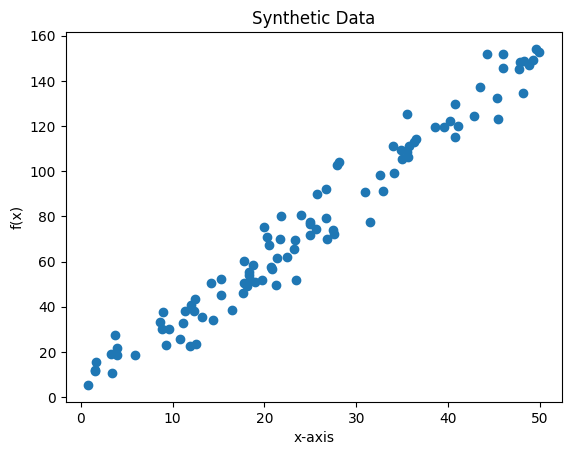

In [71]:
vis_data(x_values, y_values, 'f(x)')

In [72]:
def find_coefficients(x, y):
    n = len(x)   # training examples
    w = (n * x @ y - x.sum() * y.sum()) / (n * (x**2).sum() - x.sum()**2)
    b = (y.sum() - w * x.sum()) / n
    return w, b

In [73]:
x_normalized = (x_values - np.mean(x_values)) / np.std(x_values)
y_normalized = (y_values - np.mean(y_values)) / np.std(y_values)

In [74]:
w, b = find_coefficients(x_normalized, y_normalized)

In [75]:
print(f"w = {w}")
print(f"b = {b}")

w = 0.9809050828552103
b = 1.4975058136730641e-16


In [76]:
def predict(X, w, b):
    y_pred = np.dot(X, w) + b
    return y_pred

In [82]:
from sklearn.metrics import r2_score, mean_squared_error

def evaluate(X, Y, w, b):
    y_pred = predict(X, w, b)
    mse = mean_squared_error(Y, y_pred)
    r2 = r2_score(Y, y_pred)
    return mse, r2

In [83]:
def plot_best_fit(X, Y, w, b):
    plt.scatter(X, Y, label='Actual')
    y_pred = predict(X, w, b)
    
    mse, r2 = evaluate(X, Y, w, b)
    
    plt.plot(X, y_pred, color='red', label=f"Predicted (y = {w:.2f}x + {b:.2f}, MSE={mse:.2f}, R2={r2:.2f})")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

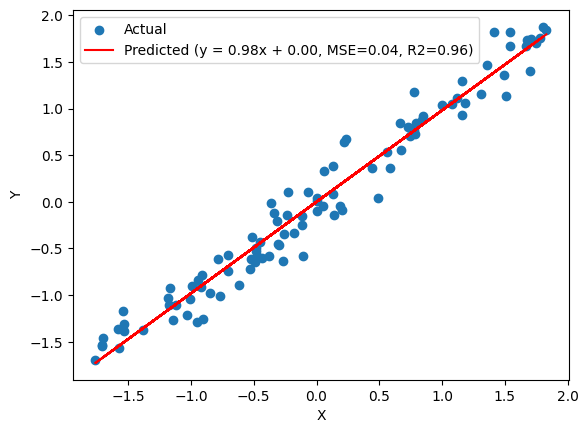

In [84]:
plot_best_fit(x_normalized, y_normalized, w, b)

In [80]:
# NEXT: split data into 80/20. Train model on the 80% and test it on 20%